In [2]:
from common import *
from mpl_toolkits.basemap import Basemap

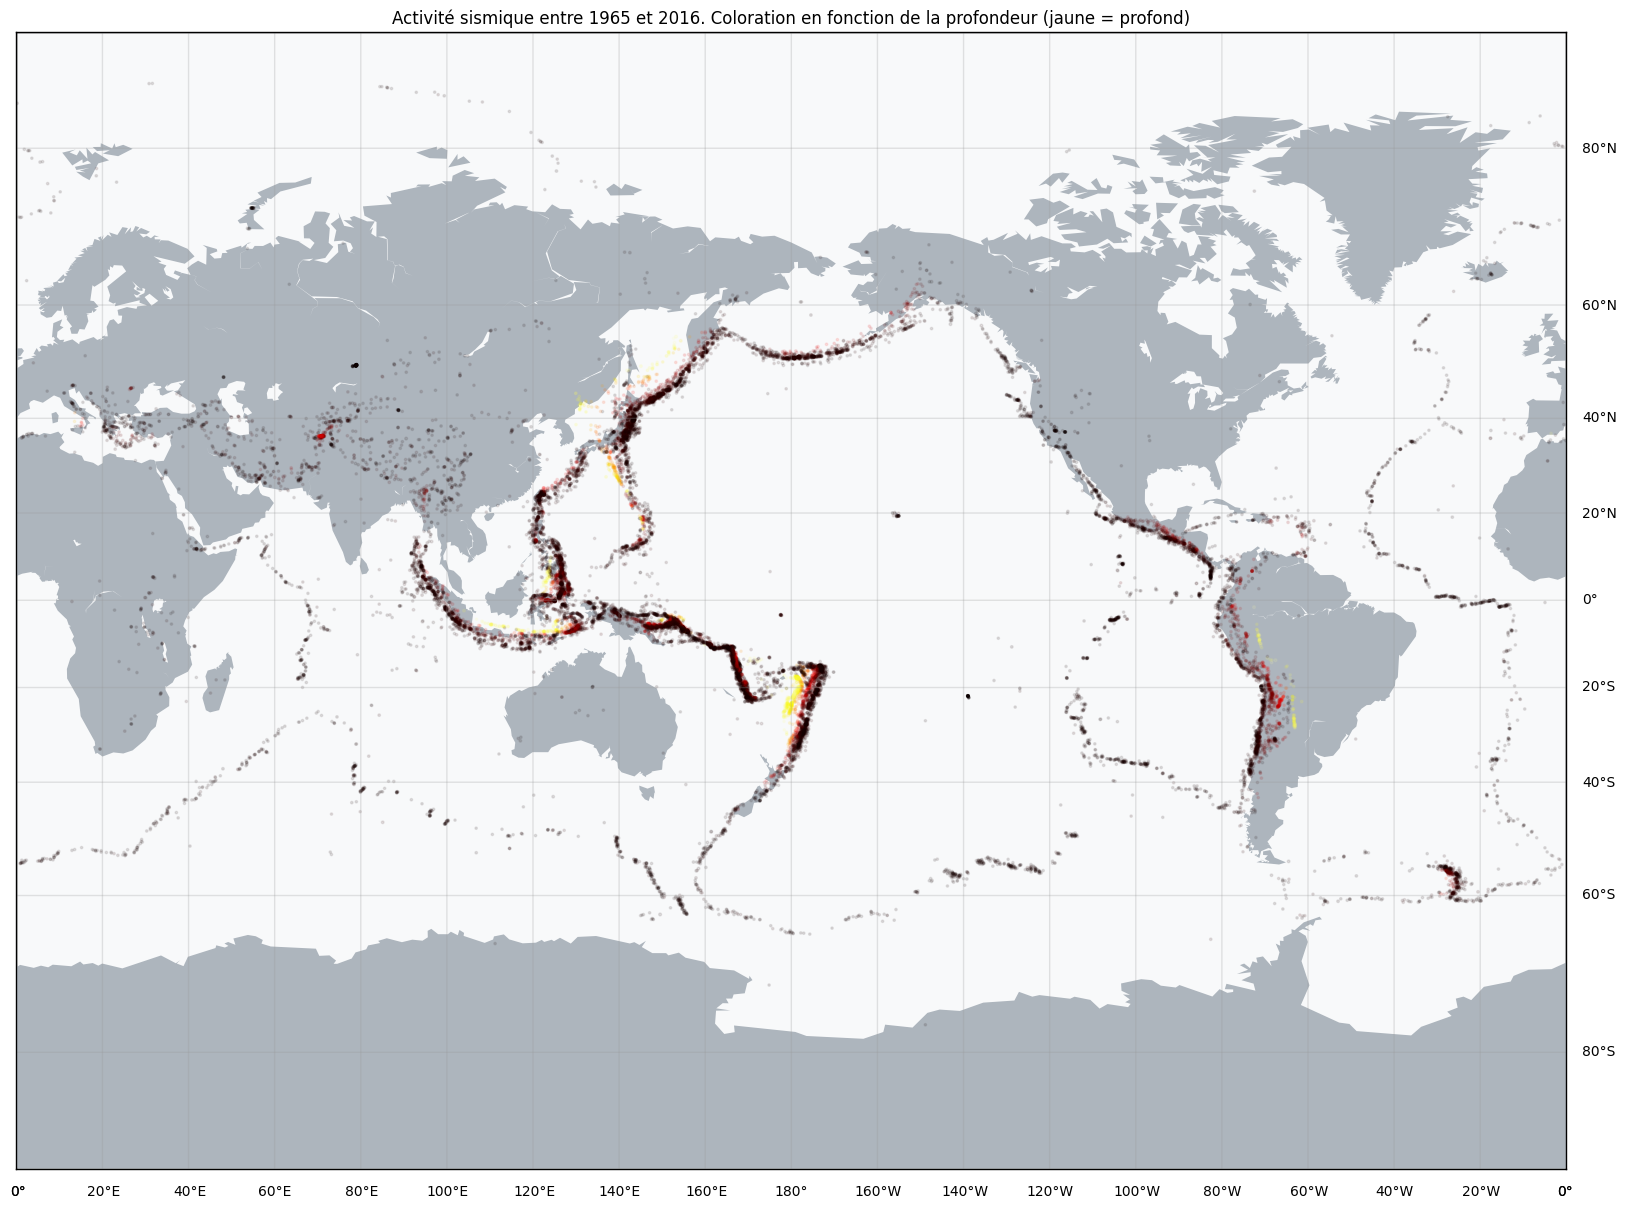

In [12]:
def create_map():
    plt.figure(figsize=(20,20))
    m = Basemap(projection='mill', lat_0=0, lon_0=-180)

    # fill background.
    m.drawmapboundary(fill_color='#f8f9fa')
    # draw coasts and fill continents.
    #m.drawcoastlines(linewidth=0.2)
    m.fillcontinents(color='#adb5bd',lake_color='#f8f9fa')

    # 20 degree graticule.
    m.drawparallels(np.arange( -80, 81,20), labels=[False,True,True,False], dashes=[1,0], color="#9994")
    m.drawmeridians(np.arange(-180,180,20), labels=[True,False,False,True], dashes=[1,0], color="#9994")
    return m

def plot_before(year):
    ndf = df[df.Date.dt.year <= year]
    m = create_map()
    m.scatter(x=ndf["Longitude"], y=ndf["Latitude"], latlon=True, c=ndf["Magnitude"], cmap="hot", s=ndf["Magnitude"]*2, marker='.', alpha=0.1)
    plt.title(f"Activité sismique entre 1965 et {year}")
    return plt.savefig(f"./visuals/map_{year}.png")

def plot_series(ndf, title):
    m = create_map()
    m.scatter(x=ndf["Longitude"], y=ndf["Latitude"], latlon=True, c=ndf["Magnitude"], cmap="hot", s=ndf["Magnitude"]*2, marker='.', alpha=0.5)
    plt.title(title)
    return plt.show()

m = create_map()
m.scatter(x=df["Longitude"], y=df["Latitude"], latlon=True, c=df["Depth"], cmap="hot", s=df["Magnitude"]*2, marker='.', alpha=0.1)
plt.title(f"Activité sismique entre 1965 et 2016. Coloration en fonction de la profondeur (jaune = profond)")
plt.show()


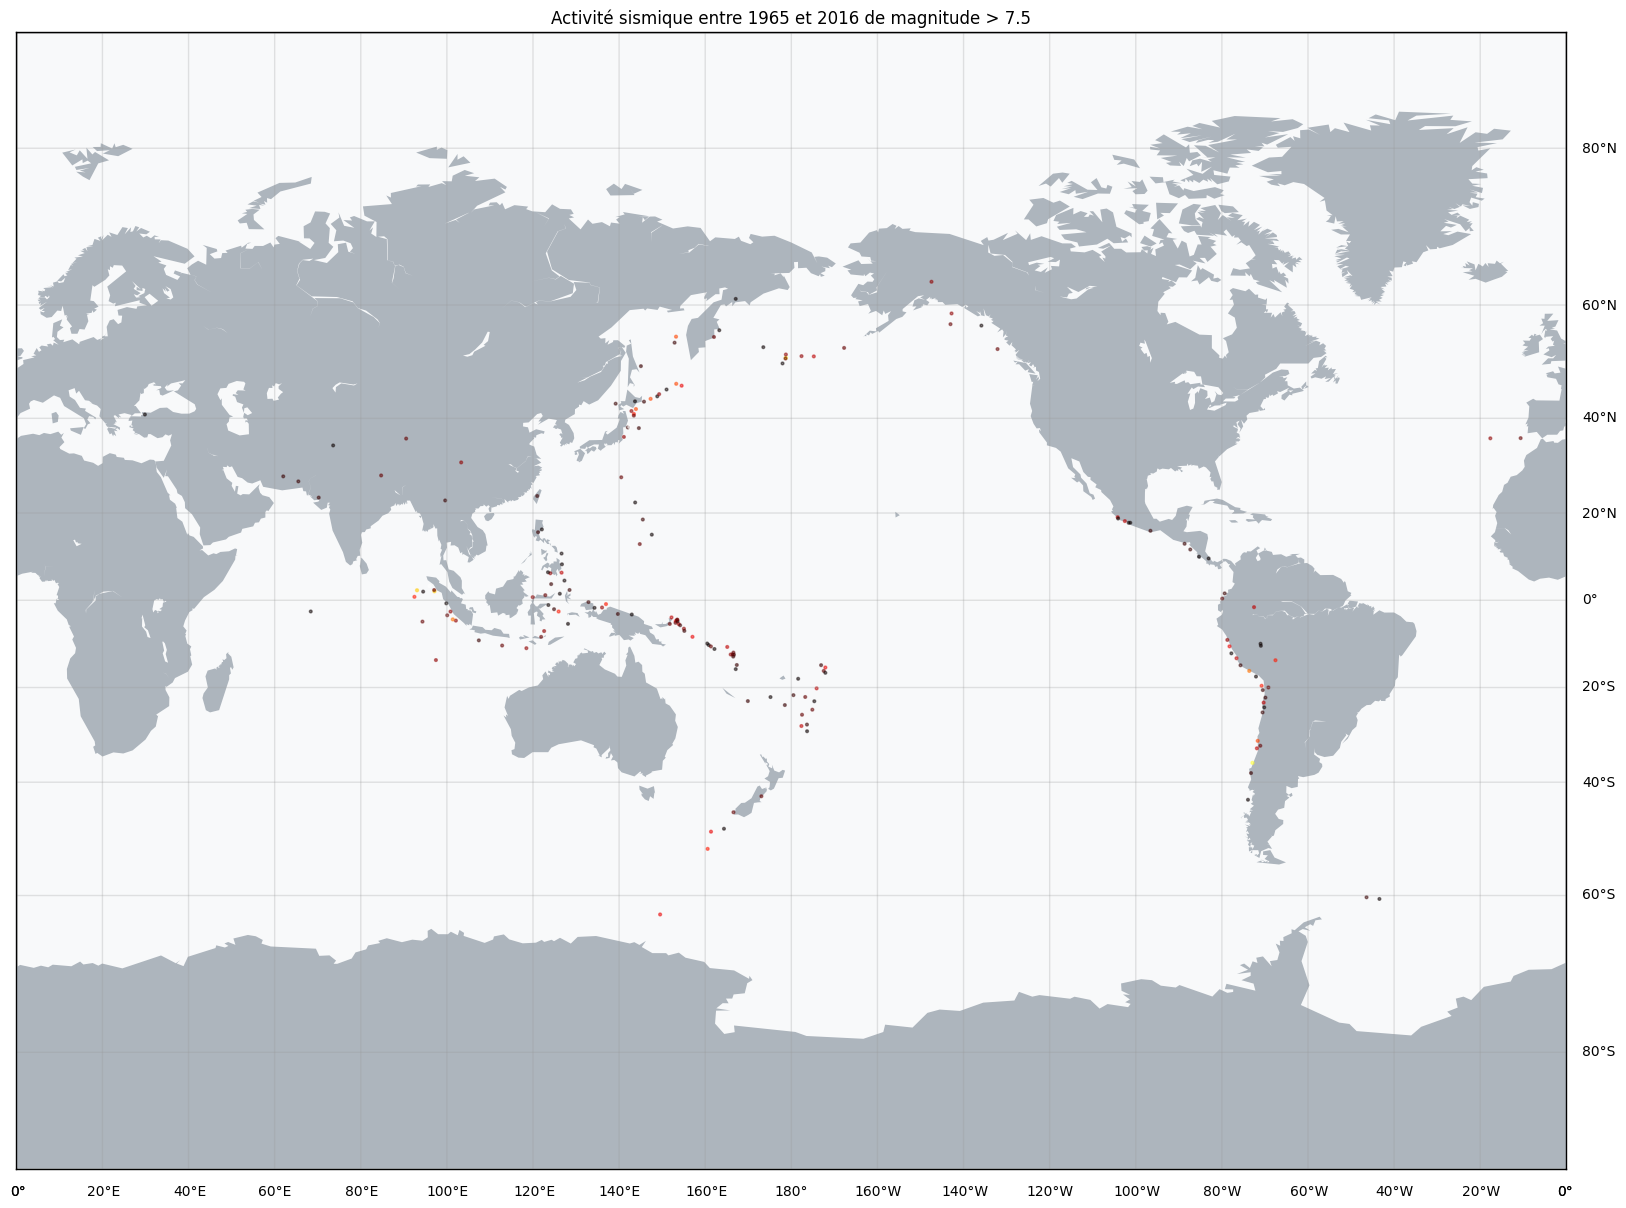

In [8]:
plot_series(df[df.Magnitude>7.5], "Activité sismique entre 1965 et 2016 de magnitude > 7.5")

In [ ]:
plot_series(df[df.Type != "Earthquake"], "Activité")

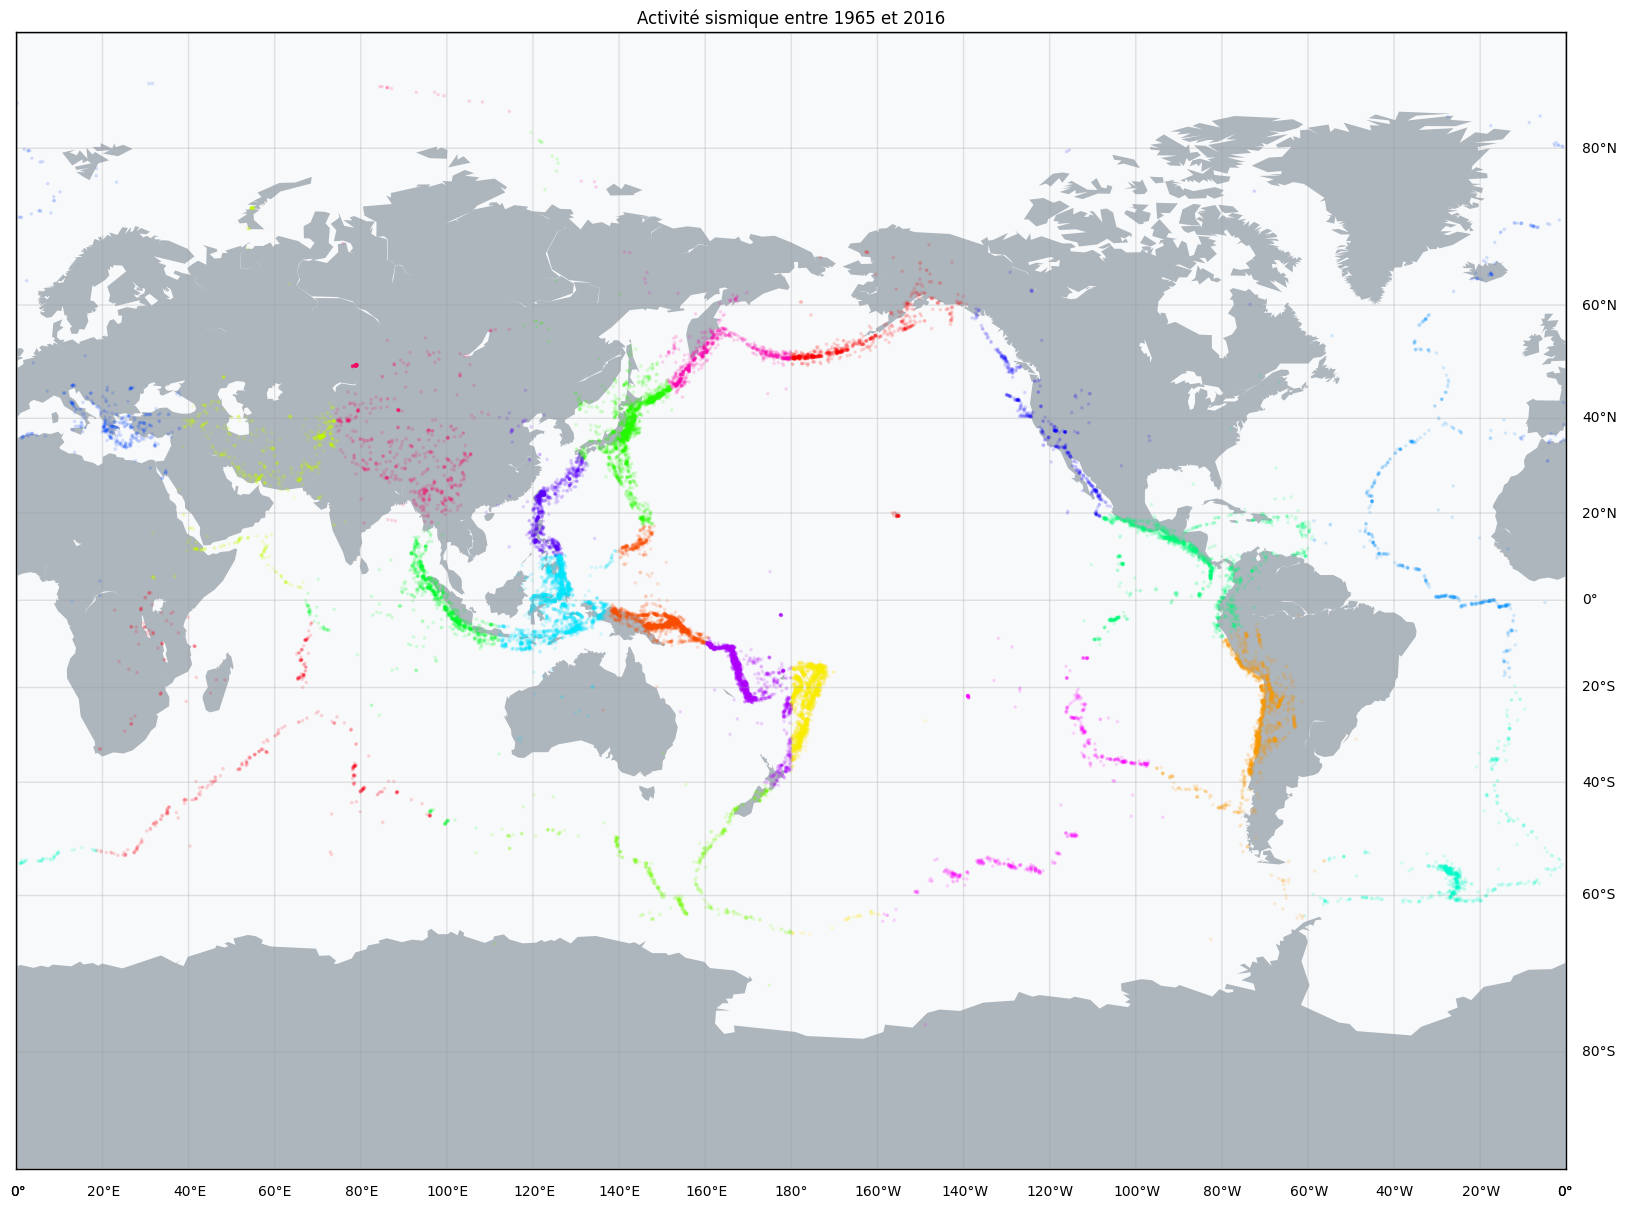

In [4]:
m = create_map()
m.scatter(x=df["Longitude"], y=df["Latitude"], latlon=True, c=df["GeoGroup"], cmap="hsv", s=df["Magnitude"]*2, marker='.', alpha=0.1)
plt.title(f"Activité sismique entre 1965 et 2016")
plt.show()

<Axes: xlabel='Date'>

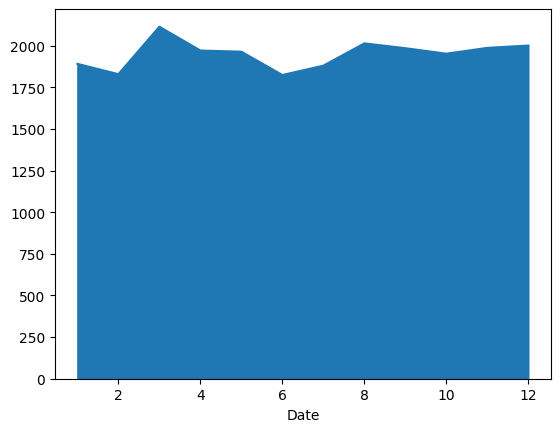

In [102]:
df_date = df.groupby(by=df.Date.dt.month).agg(nombre=("Magnitude", "count"), magnitude=("Magnitude", "mean"))
df_date["nombre"].plot(kind="area")
# On remarque qu'il y a plus de séismes en mars, moins en janvier et en juin : cette disparité est-elle corrélée avec l'emplacement géographique?

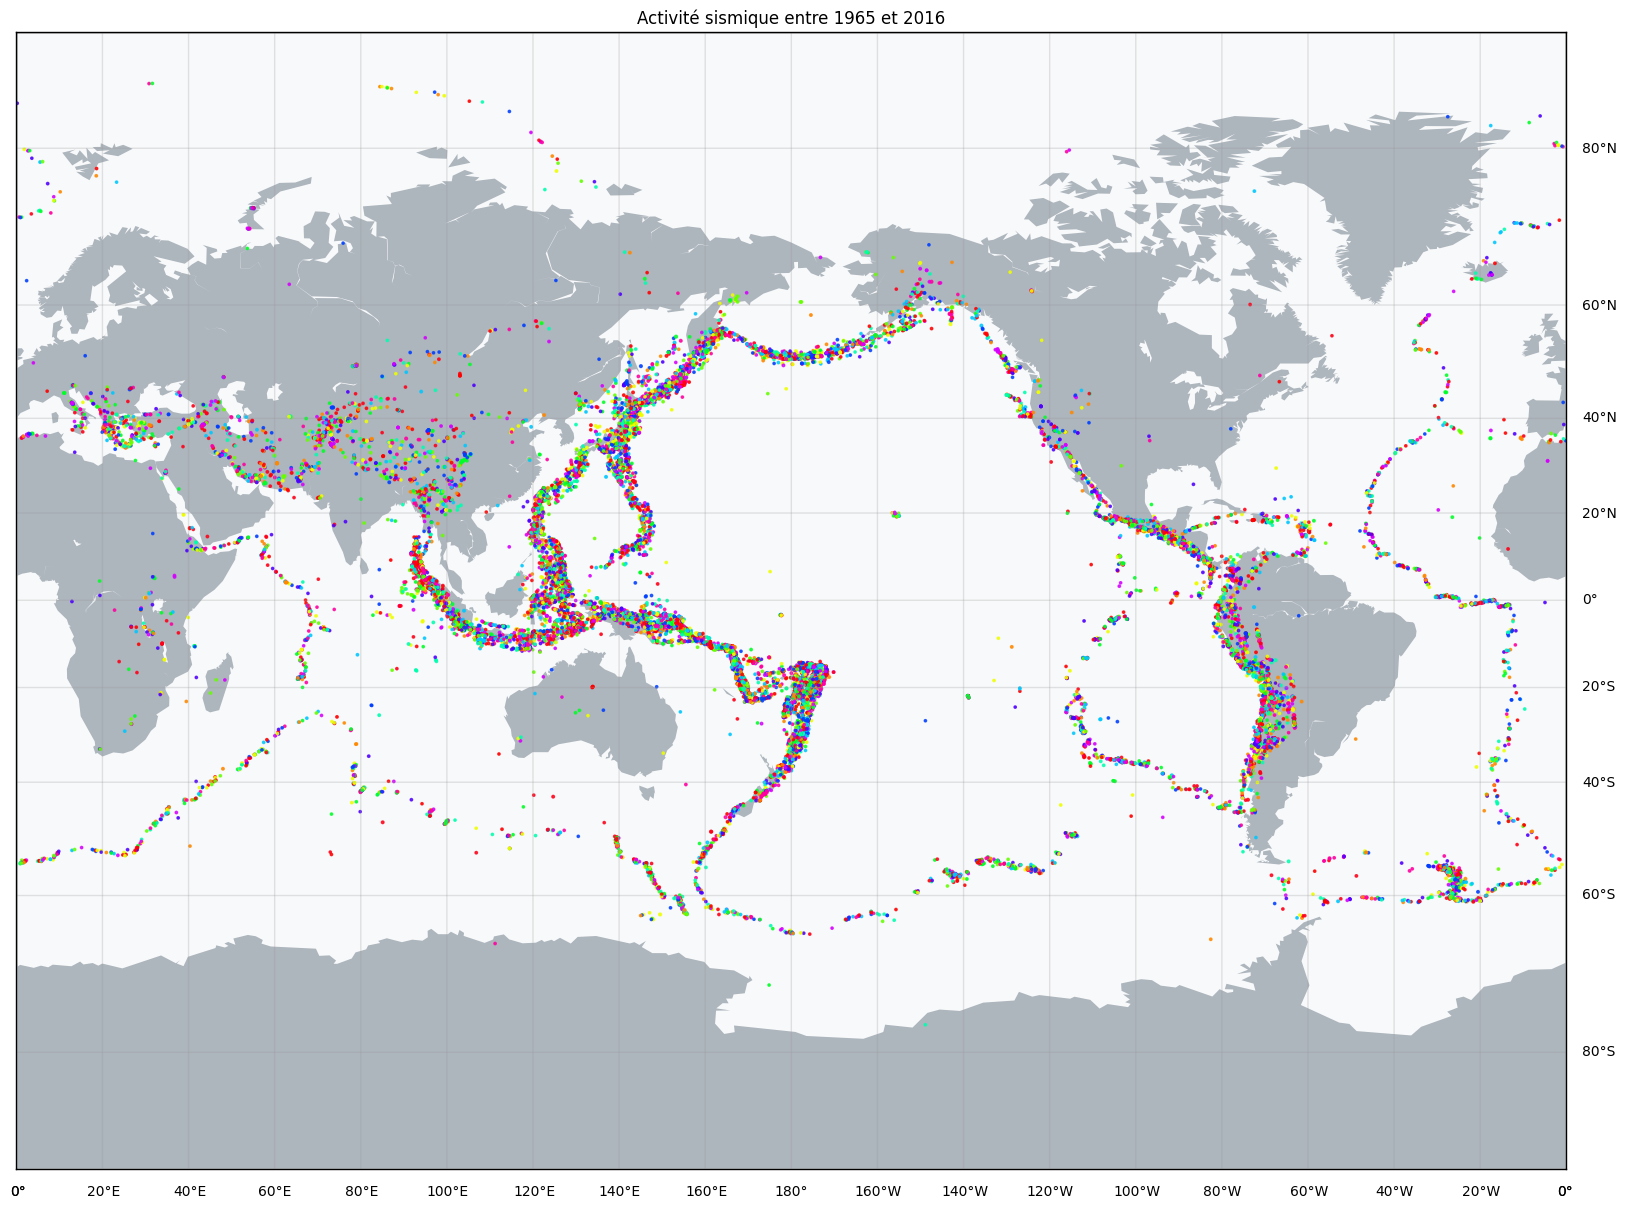

In [107]:
df["Month"] = df.Date.dt.month
m = create_map()
m.scatter(x=df["Longitude"], y=df["Latitude"], latlon=True, c=df["Month"], s=df["Magnitude"]*2, marker='.', alpha=0.8, cmap="hsv")
plt.title(f"Activité sismique entre 1965 et 2016")
plt.show()
# a priori, non?

In [47]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

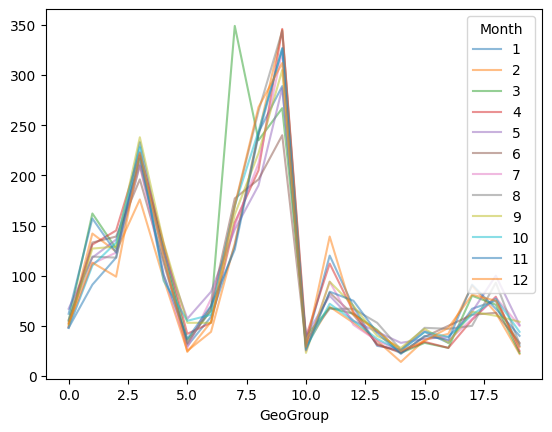

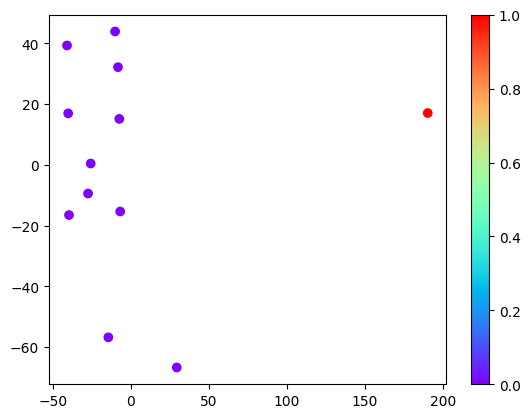

In [122]:
pivoted = df.pivot_table(index="Month", columns="GeoGroup", values="Magnitude", aggfunc="count").T
pivoted.plot(alpha=0.5)
plt.show()
pca_input=pivoted.T
pca_output = PCA(2, svd_solver='full').fit_transform(pca_input)
#plt.scatter(pca_output[:, 0], pca_output[:, 1], marker='.', color='green')
gmm = GaussianMixture(2)
labels = gmm.fit(pca_input).predict(pca_input)
plt.scatter(pca_output[:, 0], pca_output[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

<Axes: xlabel='GeoGroup'>

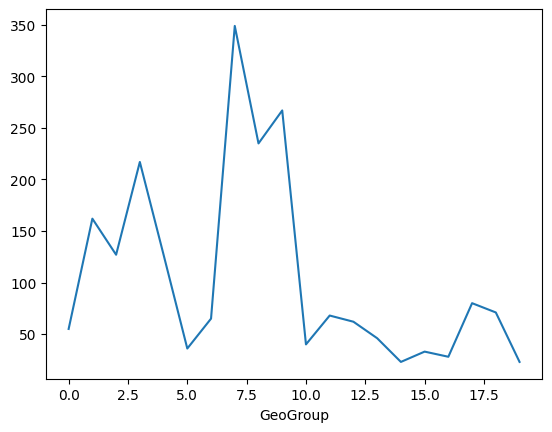

In [123]:
pivoted.loc[:, labels==1].plot(legend=False)

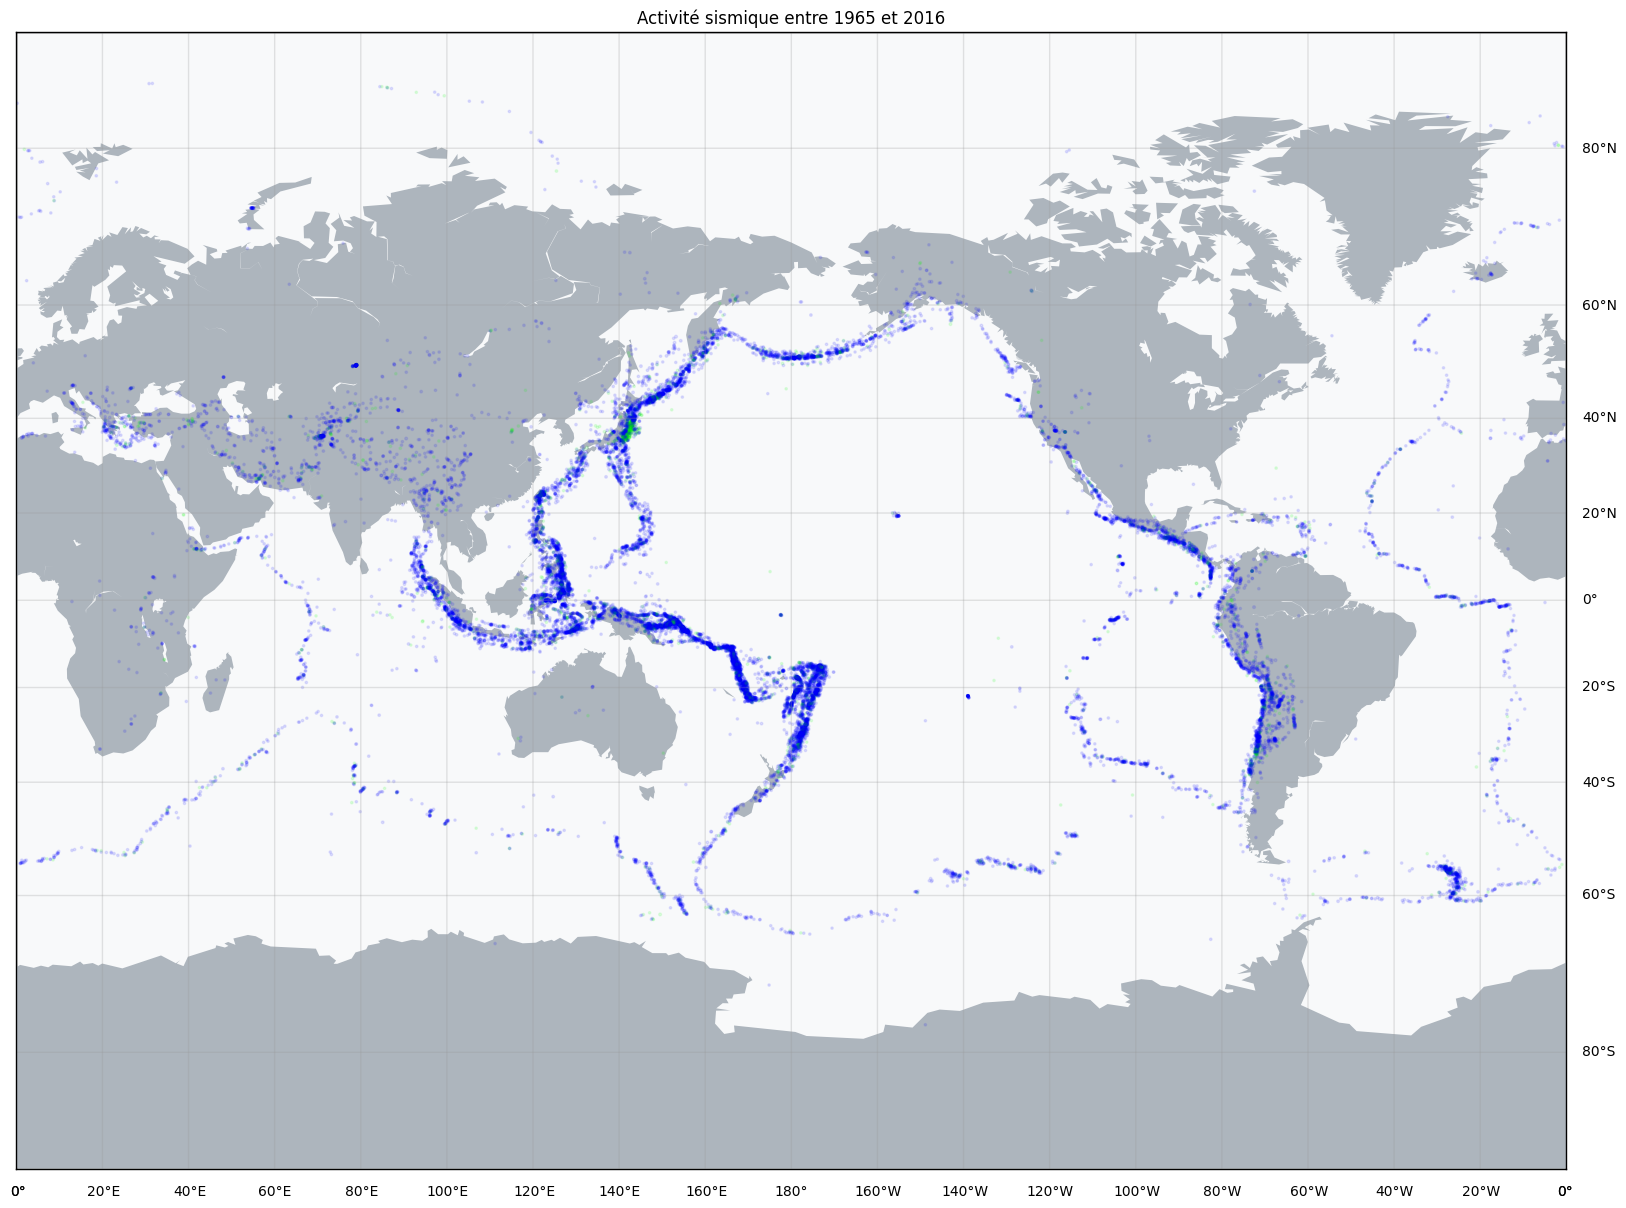

In [125]:
df["MonthGroup"] = df["Month"].apply(lambda i: labels[i-1])

m = create_map()
m.scatter(x=df["Longitude"], y=df["Latitude"], latlon=True, c=df["MonthGroup"], s=df["Magnitude"]*2, marker='.', alpha=0.1, cmap="brg")
plt.title(f"Activité sismique entre 1965 et 2016")
plt.show()

# On observe une zone colorée au large du Japon, qui est liée au mois de mars (cf les graphes de corrélation ci-dessus)

In [97]:
df.pivot_table(index="MonthGroup", columns=df.Date.dt.month, values="Magnitude", aggfunc="count")

Date,1,2,3,4,5,6,7,8,9,10,11,12
MonthGroup,,,,,,,,,,,,
0,1891.0,1829.0,NaN,1971.0,NaN,NaN,1880.0,2014.0,1985.0,1952.0,1987.0,2001.0
1,NaN,NaN,2114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,1964.0,1824.0,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_status = df[["Status", "Magnitude"]].groupby(by="Status").agg(nombre=("Magnitude", "count"), magnitude=("Magnitude", "mean"))
df_status

,nombre,magnitude
Status,,
Automatic,2639,6.005616
Reviewed,20773,5.866894
